In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from datetime import timedelta

In [2]:
#historical data of 10-8, could be switched to other files for similar analysis
df_F8 = pd.read_csv('Fetterman_108.csv')
df_M8 = pd.read_csv('Mehmet_108.csv')

In [6]:
df_F8.head()

,Unnamed: 0,tweet_id,date,full_text,tweet_type,reply_count,quote_count,likes_count,retweet_counts,hyperlink
0,0,1578807491374493697,Sat Oct 08 18:00:13 +0000 2022,"(datetime.datetime(2022, 10, 8, 18, 0, 13, tzi...",Original Tweet,1,0,0,0,https://twitter.com/twitter/status/15788074913...
1,1,1578544204065562625,Sat Oct 08 00:34:00 +0000 2022,"(datetime.datetime(2022, 10, 8, 0, 34, tzinfo=...",Reply Tweet,0,0,0,0,https://twitter.com/twitter/status/15785442040...
2,2,1578542539774185472,Sat Oct 08 00:27:24 +0000 2022,"(datetime.datetime(2022, 10, 8, 0, 27, 24, tzi...",Reply Tweet,0,0,0,0,https://twitter.com/twitter/status/15785425397...
3,3,1578539422814904321,Sat Oct 08 00:15:00 +0000 2022,"(datetime.datetime(2022, 10, 8, 0, 15, tzinfo=...",Reply Tweet,0,0,0,0,https://twitter.com/twitter/status/15785394228...
4,4,1578897650664890368,Sat Oct 08 23:58:29 +0000 2022,Mehmet Oz likes to pretend that Fetterman used...,Retweet,0,0,0,0,https://twitter.com/twitter/status/15788976506...


In [12]:
df_F8['full_text'].iloc[0][0]

'('

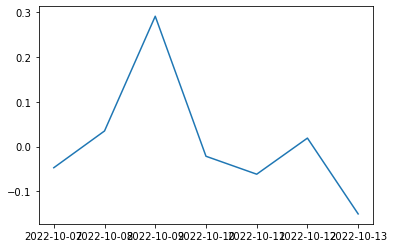

In [41]:
plt.plot(group_F['comp'].mean())

In [26]:
df_F = pd.read_csv('fetterman_tmp_data.csv', index_col=[0])
df_M = pd.read_csv('mehmet_tmp_data.csv', index_col=[0])
df_poll = pd.read_csv('poll_Oct.csv', index_col=[0])

In [14]:
df_F.head()

,timestamp,text
0,2022-10-09 00:59:51+00:00,"RT @DrOz: If John Fetterman got his way, he wo..."
1,2022-10-09 00:59:36+00:00,"RT @DrOz: If John Fetterman got his way, he wo..."
2,2022-10-09 00:59:29+00:00,RT @ProudElephantUS: John Fetterman wants to t...
3,2022-10-09 00:59:26+00:00,RT @RNCResearch: John Fetterman: “Thank you so...
4,2022-10-09 00:59:22+00:00,RT @thepugnews: Dr. Mehmet Oz has turned his a...


In [44]:
df_F['timestamp'].values[1][:10]
#df_F['timestamp'][0]

'2022-10-09'

In [29]:
date_list = [datetime.strptime(stamp[:10],'%Y-%m-%d').date() for stamp in df_F['timestamp'].values]
date_list2 = [datetime.strptime(stamp[:10],'%Y-%m-%d').date() for stamp in df_M['timestamp'].values]
date_list3 = [datetime.strptime(stamp,'%m/%d/%Y').date() for stamp in df_poll['date'].values]

In [31]:
df_F['date'] = date_list
df_M['date'] = date_list2
df_poll['date'] = date_list3

In [17]:
data_F = df_F[['text', 'date']]
data_M = df_M[['text', 'date']]

In [21]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

def sentiment(data):
    tweets = data['text'].values
    positive  = 0
    negative = 0
    neutral = 0
    polarity = 0
    tweet_list = []
    neutral_list = []
    negative_list = []
    positive_list = []
    comp_list = []
    
    for tweet in tweets:
    
        tweet_list.append(tweet)
        analysis = TextBlob(tweet)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity

        neutral_list += [neu]
        negative_list += [neg]
        positive_list += [pos]
        comp_list += [comp]
        
    data['neg_score'] = negative_list
    data['neu_score'] = neutral_list
    data['pos_score'] = positive_list
    data['comp'] = comp_list
    
    print('data sentiment calculation done')

In [22]:
sentiment(data_F)
sentiment(data_M)

data sentiment calculation done
data sentiment calculation done


In [33]:
data_F
data_M

,text,date,neg_score,neu_score,pos_score,comp
0,Mehmet Oz Gives Speech Near Hitler's Car And C...,2022-10-09,0.000,1.000,0.000,0.0000
1,RT @TristanSnell: Herschel Walker — pays for a...,2022-10-09,0.148,0.741,0.111,-0.2263
2,RT @TristanSnell: Herschel Walker — pays for a...,2022-10-09,0.148,0.741,0.111,-0.2263
3,RT @KylaInTheBurgh: In just one week we learne...,2022-10-09,0.260,0.740,0.000,-0.8442
4,RT @TristanSnell: Herschel Walker — pays for a...,2022-10-09,0.148,0.741,0.111,-0.2263
...,...,...,...,...,...,...
7144,RT @TristanSnell: Mehmet Oz said he believes b...,2022-10-14,0.000,1.000,0.000,0.0000
7145,RT @MollyJongFast: He was paying her https://...,2022-10-14,0.000,1.000,0.000,0.0000
7146,RT @NoLieWithBTC: NEW: Dr. Oz staged an event ...,2022-10-14,0.220,0.780,0.000,-0.7579
7147,RT @NoLieWithBTC: NEW: Dr. Oz staged an event ...,2022-10-14,0.220,0.780,0.000,-0.7579


In [24]:
group_F = data_F.groupby(['date'])
group_M = data_M.groupby(['date'])

In [39]:
poll_F = df_poll[['date', 'Fetterman']]
poll_M = df_poll[['date', 'Mehmet']]
poll_F.set_index('date',inplace=True)
poll_M.set_index('date',inplace=True)
poll_F.iloc[-6:]

,Fetterman
date,
2022-10-09,46.0
2022-10-10,46.0
2022-10-11,46.0
2022-10-12,46.0
2022-10-13,46.2
2022-10-14,46.2


In [25]:
group_F['comp'].mean()

date
2022-10-09   -0.103673
2022-10-10   -0.123326
2022-10-11   -0.110766
2022-10-12    0.081829
2022-10-13   -0.056345
2022-10-14   -0.047665
Name: comp, dtype: float64

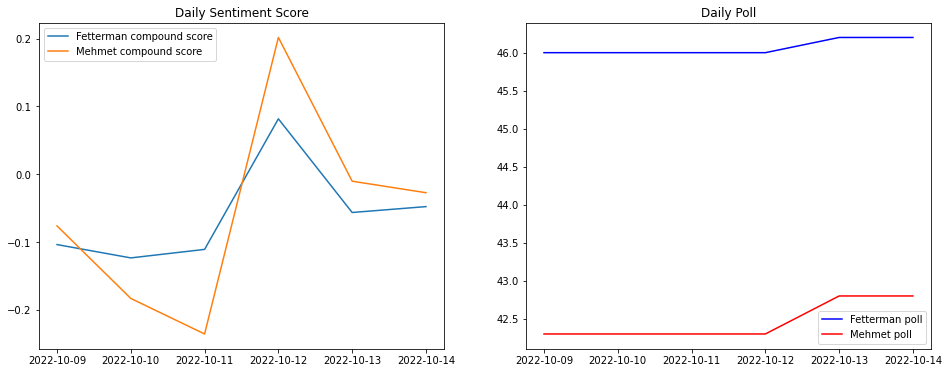

In [55]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
axes[0].plot(group_F['comp'].mean(),label='Fetterman compound score')
axes[0].plot(group_M['comp'].mean(),label='Mehmet compound score')
axes[1].plot(poll_F.iloc[-6:], 'b-', label='Fetterman poll')
axes[1].plot(poll_M.iloc[-6:], 'r-', label='Mehmet poll')
axes[0].set_title('Daily Sentiment Score')
axes[1].set_title('Daily Poll')
axes[0].legend()
axes[1].legend()
plt.show()

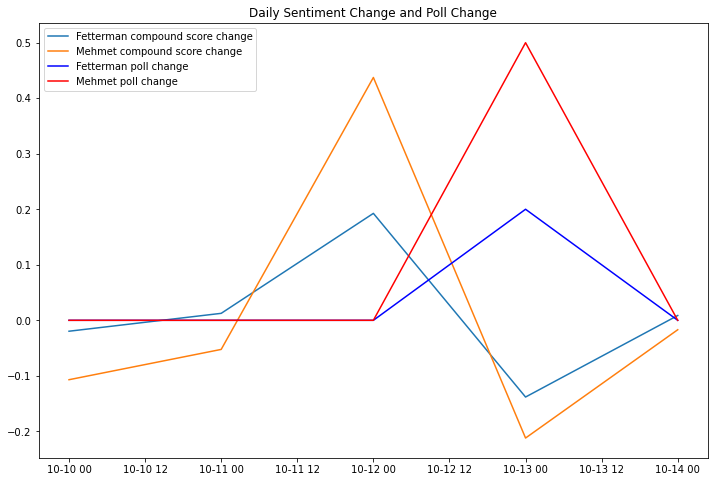

In [57]:
plt.figure(figsize=(12,8))
plt.plot(group_F['comp'].mean().diff()[1:], label = 'Fetterman compound score change')
plt.plot(group_M['comp'].mean().diff()[1:], label = 'Mehmet compound score change')
plt.plot(poll_F.diff()[-5:], 'b-', label = 'Fetterman poll change')
plt.plot(poll_M.diff()[-5:], 'r-', label = 'Mehmet poll change')
plt.legend()
plt.title('Daily Sentiment Change and Poll Change')
plt.show()

In [53]:
group_F['comp'].mean().diff()[1:]
poll_F.diff()[-5:]

,Fetterman
date,
2022-10-10,0.0
2022-10-11,0.0
2022-10-12,0.0
2022-10-13,0.2
2022-10-14,0.0


date
2022-10-09    AxesSubplot(0.125,0.125;0.775x0.755)
2022-10-10    AxesSubplot(0.125,0.125;0.775x0.755)
2022-10-11    AxesSubplot(0.125,0.125;0.775x0.755)
2022-10-12    AxesSubplot(0.125,0.125;0.775x0.755)
2022-10-13    AxesSubplot(0.125,0.125;0.775x0.755)
2022-10-14    AxesSubplot(0.125,0.125;0.775x0.755)
Name: comp, dtype: object

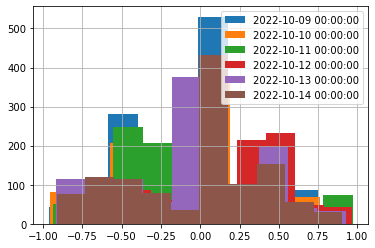

In [78]:
group_F['comp'].hist(legend=True)

In [78]:
F_d1 = data_F[data_F['date'] == date(2022,10,9)]
F_d2 = data_F[data_F['date'] == date(2022,10,10)]
F_d3 = data_F[data_F['date'] == date(2022,10,11)]
F_d4 = data_F[data_F['date'] == date(2022,10,12)]
F_d5 = data_F[data_F['date'] == date(2022,10,13)]
F_d6 = data_F[data_F['date'] == date(2022,10,14)]
M_d1 = data_M[data_M['date'] == date(2022,10,9)]
M_d2 = data_M[data_M['date'] == date(2022,10,10)]
M_d3 = data_M[data_M['date'] == date(2022,10,11)]
M_d4 = data_M[data_M['date'] == date(2022,10,12)]
M_d5 = data_M[data_M['date'] == date(2022,10,13)]
M_d6 = data_M[data_M['date'] == date(2022,10,14)]

In [59]:
import seaborn as sns

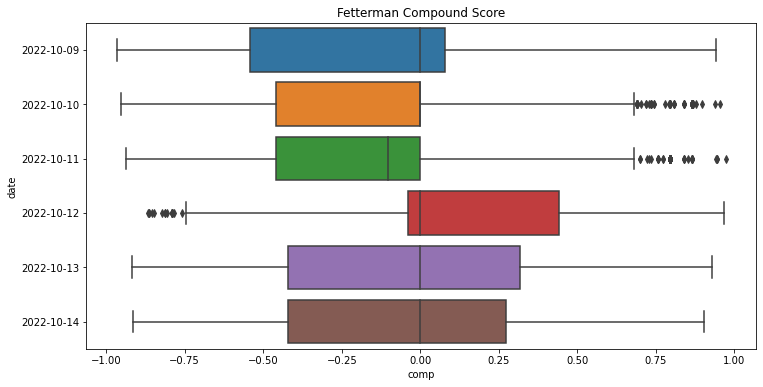

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_F, x="comp", y="date")
plt.title('Fetterman Compound Score')
plt.show()

<AxesSubplot:xlabel='neg_score', ylabel='date'>

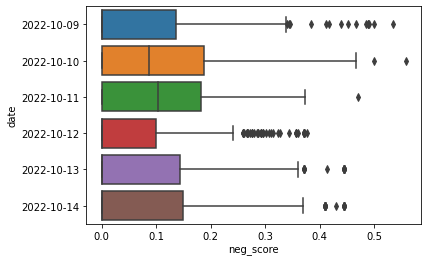

In [81]:
sns.boxplot(data=data_F, x="neg_score", y="date")

<AxesSubplot:xlabel='pos_score', ylabel='date'>

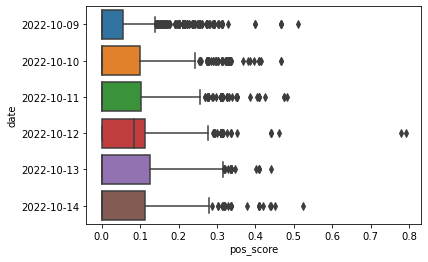

In [82]:
sns.boxplot(data=data_F, x="pos_score", y="date")

<AxesSubplot:xlabel='comp', ylabel='date'>

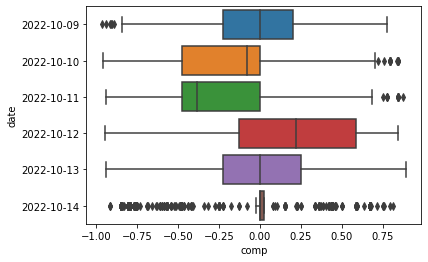

In [83]:
sns.boxplot(data=data_M, x="comp", y="date")

<AxesSubplot:xlabel='neg_score', ylabel='date'>

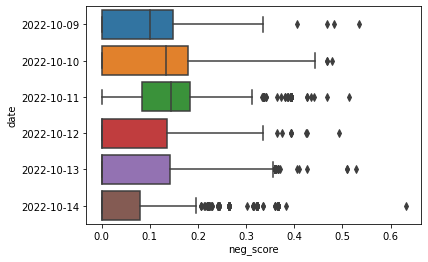

In [84]:
sns.boxplot(data=data_M, x="neg_score", y="date")

<AxesSubplot:xlabel='pos_score', ylabel='date'>

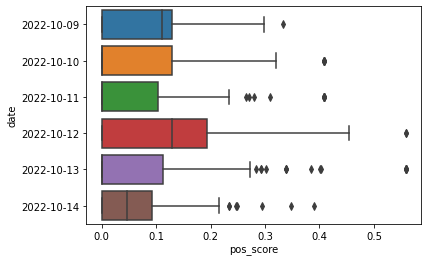

In [85]:
sns.boxplot(data=data_M, x="pos_score", y="date")

In [86]:
M_d3_pos = M_d3[M_d3['comp'] > 0]
M_d4_pos = M_d4[M_d4['comp'] > 0]
M_d5_pos = M_d5[M_d5['comp'] > 0]
F_d3_pos = F_d3[F_d3['comp'] > 0]
F_d4_pos = F_d4[F_d4['comp'] > 0]
F_d5_pos = F_d5[F_d5['comp'] > 0]
M_d35_pos = pd.concat([M_d3_pos, M_d4_pos, M_d5_pos])
F_d35_pos = pd.concat([F_d3_pos, F_d4_pos, F_d5_pos])

In [87]:
M_d35_pos['candidate'] = 'Mehmet'
F_d35_pos['candidate'] = 'Fetterman'
d35_pos = pd.concat([M_d35_pos, F_d35_pos])

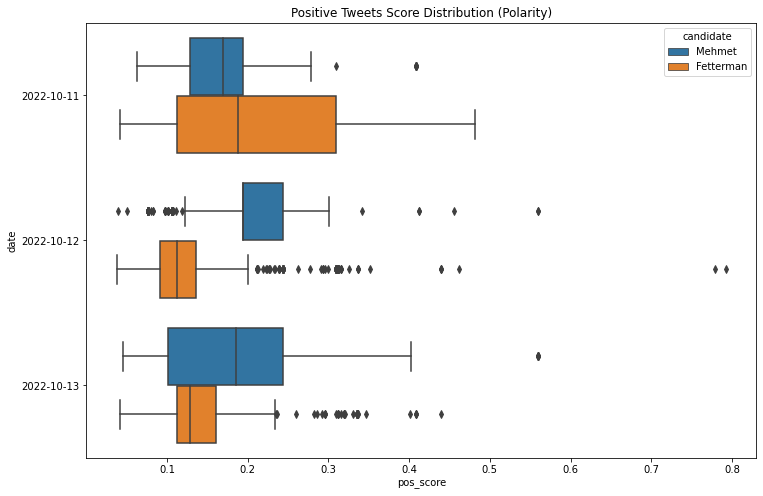

In [90]:
plt.figure(figsize=(12,8))
sns.boxplot(data=d35_pos, x="pos_score", y="date", hue='candidate')
plt.title('Positive Tweets Score Distribution (Polarity)')
plt.show()

In [92]:
M_d3_neg = M_d3[M_d3['comp'] < 0]
M_d4_neg = M_d4[M_d4['comp'] < 0]
M_d5_neg = M_d5[M_d5['comp'] < 0]
F_d3_neg = F_d3[F_d3['comp'] < 0]
F_d4_neg = F_d4[F_d4['comp'] < 0]
F_d5_neg = F_d5[F_d5['comp'] < 0]
M_d35_neg = pd.concat([M_d3_neg, M_d4_neg, M_d5_neg])
F_d35_neg = pd.concat([F_d3_neg, F_d4_neg, F_d5_neg])

In [93]:
M_d35_neg['candidate'] = 'Mehmet'
F_d35_neg['candidate'] = 'Fetterman'
d35_neg = pd.concat([M_d35_neg, F_d35_neg])

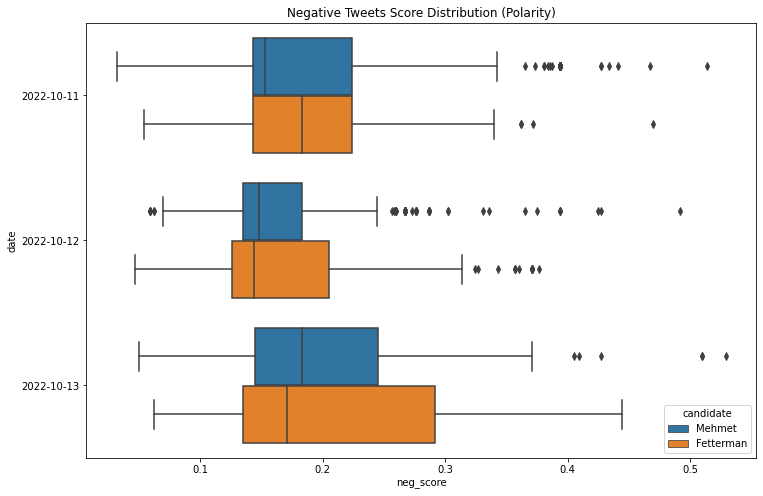

In [94]:
plt.figure(figsize=(12,8))
sns.boxplot(data=d35_neg, x="neg_score", y="date", hue='candidate')
plt.title('Negative Tweets Score Distribution (Polarity)')
plt.show()